<a href="https://colab.research.google.com/github/greyson-newton/enterprise_predictive_maintenance/blob/main/failureMode_ml_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("drive/My Drive/Enterprise Products/Coding Challenge/")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
# from sdv.tabular import GaussianCopula
# model = GaussianCopula()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pycaret
!pip install jinja2
!pip install markupsafe==2.0.1
!pip install shap
# !pip install sdv


In [ ]:
from pycaret.utils import enable_colab 
import jinja2
from pycaret.classification import *
enable_colab()

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


Colab mode enabled.


In [ ]:
inputDF = pd.read_csv('data.csv')

twfDF = pd.read_csv('data.csv')
twfDF.loc[twfDF.Type == 'L', 'Type'] = 0
twfDF.loc[twfDF.Type == 'H', 'Type'] = 1
twfDF.loc[twfDF.Type == 'M', 'Type'] = 2
twfDF.drop('Machine failure', axis=1, inplace=True)
twfDF.drop('Product ID', axis=1, inplace=True)
# twfDF.drop('TWF', axis=1, inplace=True)
twfDF.drop('HDF', axis=1, inplace=True)
twfDF.drop('PWF', axis=1, inplace=True)
twfDF.drop('OSF', axis=1, inplace=True)
twfDF.drop('RNF', axis=1, inplace=True)
twfDF.drop('UDI', axis=1, inplace=True)

hdfDF = pd.read_csv('data.csv')
hdfDF.loc[hdfDF.Type == 'L', 'Type'] = 0
hdfDF.loc[hdfDF.Type == 'H', 'Type'] = 1
hdfDF.loc[hdfDF.Type == 'M', 'Type'] = 2
hdfDF.drop('Machine failure', axis=1, inplace=True)
hdfDF.drop('Product ID', axis=1, inplace=True)
hdfDF.drop('TWF', axis=1, inplace=True)
# hdfDF.drop('HDF', axis=1, inplace=True)
hdfDF.drop('PWF', axis=1, inplace=True)
hdfDF.drop('OSF', axis=1, inplace=True)
hdfDF.drop('RNF', axis=1, inplace=True)
hdfDF.drop('UDI', axis=1, inplace=True)

pwfDF = pd.read_csv('data.csv')
pwfDF.loc[pwfDF.Type == 'L', 'Type'] = 0
pwfDF.loc[pwfDF.Type == 'H', 'Type'] = 1
pwfDF.loc[pwfDF.Type == 'M', 'Type'] = 2
pwfDF.drop('Machine failure', axis=1, inplace=True)
pwfDF.drop('Product ID', axis=1, inplace=True)
pwfDF.drop('TWF', axis=1, inplace=True)
pwfDF.drop('HDF', axis=1, inplace=True)
# pwfDF.drop('PWF', axis=1, inplace=True)
pwfDF.drop('OSF', axis=1, inplace=True)
pwfDF.drop('RNF', axis=1, inplace=True)
pwfDF.drop('UDI', axis=1, inplace=True)

osfDF = pd.read_csv('data.csv')
osfDF.loc[osfDF.Type == 'L', 'Type'] = 0
osfDF.loc[osfDF.Type == 'H', 'Type'] = 1
osfDF.loc[osfDF.Type == 'M', 'Type'] = 2
osfDF.drop('Machine failure', axis=1, inplace=True)
osfDF.drop('Product ID', axis=1, inplace=True)
osfDF.drop('TWF', axis=1, inplace=True)
osfDF.drop('HDF', axis=1, inplace=True)
osfDF.drop('PWF', axis=1, inplace=True)
# osfDF.drop('OSF', axis=1, inplace=True)
osfDF.drop('RNF', axis=1, inplace=True)
osfDF.drop('UDI', axis=1, inplace=True)

rnfDF = pd.read_csv('data.csv')
rnfDF.loc[rnfDF.Type == 'L', 'Type'] = 0
rnfDF.loc[rnfDF.Type == 'H', 'Type'] = 1
rnfDF.loc[rnfDF.Type == 'M', 'Type'] = 2
rnfDF.drop('Machine failure', axis=1, inplace=True)
rnfDF.drop('Product ID', axis=1, inplace=True)
rnfDF.drop('TWF', axis=1, inplace=True)
rnfDF.drop('HDF', axis=1, inplace=True)
rnfDF.drop('PWF', axis=1, inplace=True)
rnfDF.drop('OSF', axis=1, inplace=True)
# rnfDF.drop('RNF', axis=1, inplace=True)
rnfDF.drop('UDI', axis=1, inplace=True)
# model.fit(rnfDF)

print(twfDF.TWF.value_counts())
print(hdfDF.HDF.value_counts())
print(pwfDF.PWF.value_counts())
print(osfDF.OSF.value_counts())
print(rnfDF.RNF.value_counts())

print(twfDF.columns)
print(hdfDF.columns)
print(pwfDF.columns)
print(osfDF.columns)
print(rnfDF.columns)

0    9954
1      46
Name: TWF, dtype: int64
0    9885
1     115
Name: HDF, dtype: int64
0    9905
1      95
Name: PWF, dtype: int64
0    9902
1      98
Name: OSF, dtype: int64
0    9981
1      19
Name: RNF, dtype: int64
Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF'],
      dtype='object')
Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'HDF'],
      dtype='object')
Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'PWF'],
      dtype='object')
Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'OSF'],
      dtype='object')
Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 

In [ ]:
sample = model.sample(20000)

In [ ]:
sample.RNF.value_counts()

0    20000
Name: RNF, dtype: int64

In [ ]:
rnfDF.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],RNF
0,2,298.1,308.6,1551,42.8,0,0
1,0,298.2,308.7,1408,46.3,3,0
2,0,298.1,308.5,1498,49.4,5,0
3,0,298.2,308.6,1433,39.5,7,0
4,0,298.2,308.7,1408,40.0,9,0


## Modelling

In [ ]:
rnf_data = setup(data = rnfDF, 
                # numeric_imputation = "median", 
                # categorical_imputation = "mode", 
                target = "RNF", train_size = 0.75, 
                # transformation = True, 
                # transformation_method = "yeo-johnson",
                fix_imbalance = True,
                # pca=True,
                # remove_outliers = True,
                # normalize = True,
                # feature_interaction = True, 
                # remove_multicollinearity = True, 
                # multicollinearity_threshold = 0.6
                # feature_ratio = True
               )
compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9984,0.5000,0.00,0.0000,0.0000,0.0000,0.0000,0.025
et,Extra Trees Classifier,0.9960,0.4356,0.00,0.0000,0.0000,-0.0015,-0.0016,0.828
rf,Random Forest Classifier,0.9952,0.4962,0.00,0.0000,0.0000,-0.0016,-0.0019,1.373
lightgbm,Light Gradient Boosting Machine,0.9928,0.4277,0.00,0.0000,0.0000,-0.0022,-0.0028,0.275
dt,Decision Tree Classifier,0.9889,0.4953,0.00,0.0000,0.0000,-0.0026,-0.0037,0.067
gbc,Gradient Boosting Classifier,0.9499,0.4441,0.00,0.0000,0.0000,-0.0031,-0.0087,2.017
ada,Ada Boost Classifier,0.9296,0.4869,0.00,0.0000,0.0000,-0.0031,-0.0107,0.585
knn,K Neighbors Classifier,0.8320,0.4699,0.15,0.0016,0.0031,-0.0001,-0.0012,0.147
qda,Quadratic Discriminant Analysis,0.7945,0.5352,0.20,0.0005,0.0009,-0.0022,-0.0041,0.033
ridge,Ridge Classifier,0.6584,0.0000,0.40,0.0020,0.0039,0.0007,0.0056,0.028


DummyClassifier(constant=None, random_state=8271, strategy='prior')

In [ ]:
rnfDF.drop('Torque [Nm]', axis=1, inplace=True)
rnfDF.drop('Rotational speed [rpm]', axis=1, inplace=True)
twf_data = setup(data = twfDF, 
                # numeric_imputation = "median", 
                # categorical_imputation = "mode", 
                target = "TWF", train_size = 0.75, 
                transformation = True, 
                # transformation_method = "yeo-johnson",
                fix_imbalance = True,
                # pca=True,
                # remove_outliers = True,
                normalize = True,
                # feature_interaction = True, 
                # remove_multicollinearity = True, 
                # multicollinearity_threshold = 0.6
                # feature_ratio = True
               )
compare_models()




,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9953,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.026
et,Extra Trees Classifier,0.9885,0.9396,0.1250,0.0702,0.0890,0.0838,0.0878,0.822
rf,Random Forest Classifier,0.9873,0.9376,0.1167,0.0837,0.0937,0.0882,0.0910,1.444
dt,Decision Tree Classifier,0.9865,0.5785,0.1667,0.0850,0.1121,0.1064,0.1126,0.088
lightgbm,Light Gradient Boosting Machine,0.9856,0.9579,0.1500,0.0965,0.1056,0.0998,0.1075,0.232
knn,K Neighbors Classifier,0.9688,0.7200,0.4500,0.0691,0.1190,0.1118,0.1661,0.146
gbc,Gradient Boosting Classifier,0.9672,0.9284,0.5500,0.0794,0.1383,0.1312,0.1995,1.850
ada,Ada Boost Classifier,0.9492,0.9574,0.7250,0.0650,0.1189,0.1113,0.2062,0.573
lr,Logistic Regression,0.9303,0.9728,0.9417,0.0609,0.1142,0.1064,0.2291,0.088
svm,SVM - Linear Kernel,0.9253,0.0000,0.9083,0.0553,0.1041,0.0962,0.2130,0.044


DummyClassifier(constant=None, random_state=2230, strategy='prior')

In [ ]:

hdf_data = setup(data = hdfDF, 
                # numeric_imputation = "median", 
                # categorical_imputation = "mode", 
                target = "HDF", train_size = 0.75, 
                # transformation = True, 
                # transformation_method = "yeo-johnson",
                fix_imbalance = True,
                # pca=True,
                # remove_outliers = True,
                normalize = True,
                # feature_interaction = True, 
                # remove_multicollinearity = True, 
                # multicollinearity_threshold = 0.6
                # feature_ratio = True
               )
compare_models()



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9984,0.9894,0.9778,0.9099,0.9396,0.9388,0.9410,0.216
dt,Decision Tree Classifier,0.9969,0.9441,0.8900,0.8741,0.8753,0.8738,0.8772,0.069
ada,Ada Boost Classifier,0.9963,0.9971,0.9667,0.8011,0.8701,0.8683,0.8753,0.549
gbc,Gradient Boosting Classifier,0.9961,0.9985,0.9556,0.7949,0.8641,0.8621,0.8678,1.730
et,Extra Trees Classifier,0.9936,0.9958,0.7533,0.7495,0.7414,0.7382,0.7433,0.818
rf,Random Forest Classifier,0.9933,0.9973,0.8044,0.7169,0.7504,0.7471,0.7523,1.451
dummy,Dummy Classifier,0.9877,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.024
knn,K Neighbors Classifier,0.9773,0.9519,0.8356,0.3379,0.4791,0.4698,0.5217,0.153
lr,Logistic Regression,0.9743,0.9959,1.0000,0.3256,0.4904,0.4807,0.5625,0.078
svm,SVM - Linear Kernel,0.9728,0.0000,0.9889,0.3156,0.4766,0.4666,0.5494,0.039


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7506, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
osf_data = setup(data = osfDF, 
                # numeric_imputation = "median", 
                # categorical_imputation = "mode", 
                target = "OSF", train_size = 0.75, 
                # transformation = True, 
                # transformation_method = "yeo-johnson",
                fix_imbalance = True,
                # pca=True,
                # remove_outliers = True,
                normalize = True,
                # feature_interaction = True, 
                # remove_multicollinearity = True, 
                # multicollinearity_threshold = 0.6
                # feature_ratio = True
               )
compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9980,0.9734,0.9339,0.8828,0.9037,0.9027,0.9051,0.459
svm,SVM - Linear Kernel,0.9975,0.0000,1.0000,0.8160,0.8939,0.8927,0.8998,0.033
dt,Decision Tree Classifier,0.9965,0.9408,0.8839,0.8007,0.8347,0.8330,0.8368,0.069
ada,Ada Boost Classifier,0.9961,0.9991,0.9607,0.7562,0.8402,0.8383,0.8475,0.544
et,Extra Trees Classifier,0.9959,0.9972,0.8000,0.7869,0.7864,0.7843,0.7879,1.006
gbc,Gradient Boosting Classifier,0.9953,0.9985,0.9607,0.7128,0.8120,0.8097,0.8222,2.553
rf,Random Forest Classifier,0.9952,0.9980,0.8018,0.7659,0.7682,0.7658,0.7737,1.389
lr,Logistic Regression,0.9909,0.9997,1.0000,0.5478,0.7010,0.6969,0.7329,0.082
dummy,Dummy Classifier,0.9900,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.040
knn,K Neighbors Classifier,0.9884,0.9232,0.8268,0.4733,0.5940,0.5887,0.6164,0.147


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6772, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
pwf_data = setup(data = pwfDF, 
                # numeric_imputation = "median", 
                # categorical_imputation = "mode", 
                target = "PWF", train_size = 0.75, 
                # transformation = True, 
                # transformation_method = "yeo-johnson",
                fix_imbalance = True,
                # pca=True,
                # remove_outliers = True,
                normalize = True,
                # feature_interaction = True, 
                # remove_multicollinearity = True, 
                # multicollinearity_threshold = 0.6
                # feature_ratio = True
               )
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9965,0.9930,0.9482,0.7623,0.8412,0.8395,0.8466,0.228
et,Extra Trees Classifier,0.9959,0.9951,0.7964,0.8185,0.7910,0.7889,0.7971,0.792
dt,Decision Tree Classifier,0.9949,0.9020,0.8071,0.7244,0.7486,0.7461,0.7547,0.098
rf,Random Forest Classifier,0.9948,0.9909,0.8500,0.7044,0.7629,0.7604,0.7676,1.583
gbc,Gradient Boosting Classifier,0.9943,0.9759,0.9321,0.6527,0.7632,0.7605,0.7751,2.751
ada,Ada Boost Classifier,0.9925,0.9482,0.9054,0.6006,0.7112,0.7077,0.7285,0.891
dummy,Dummy Classifier,0.9901,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.027
knn,K Neighbors Classifier,0.9877,0.9285,0.7964,0.4352,0.5610,0.5553,0.5825,0.215
svm,SVM - Linear Kernel,0.9877,0.0000,0.9607,0.4577,0.6138,0.6086,0.6551,0.065
qda,Quadratic Discriminant Analysis,0.9857,0.9884,0.9321,0.4205,0.5743,0.5684,0.6178,0.049


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5549, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Analysis

In [ ]:
import seaborn as sns

In [ ]:
analysisDF = pd.read_csv('data.csv')
analysisDF.drop('Machine failure', axis=1, inplace=True)
analysisDF.drop('Product ID', axis=1, inplace=True)
analysisDF.drop('UDI', axis=1, inplace=True)
analysis_twf_df = analysisDF[analysisDF['TWF']==1]
analysis_hdf_df = analysisDF[analysisDF['HDF']==1]
analysis_pwf_df = analysisDF[analysisDF['PWF']==1]
analysis_osf_df = analysisDF[analysisDF['OSF']==1]
analysis_rnf_df = analysisDF[analysisDF['RNF']==1]

dfs = [analysis_twf_df,analysis_hdf_df,analysis_pwf_df,
       analysis_osf_df,analysis_rnf_df]
for df in dfs:
  df.drop('OSF', axis=1, inplace=True)
  df.drop('HDF', axis=1, inplace=True)
  df.drop('PWF', axis=1, inplace=True)
  df.drop('TWF', axis=1, inplace=True)
  df.drop('RNF', axis=1, inplace=True)
  df.drop('Type', axis=1, inplace=True)

# pwfDF.drop('PWF', axis=1, inplace=True)
# pwfDF.drop('Type', axis=1, inplace=True)

# sns.pairplot(pwfDF)

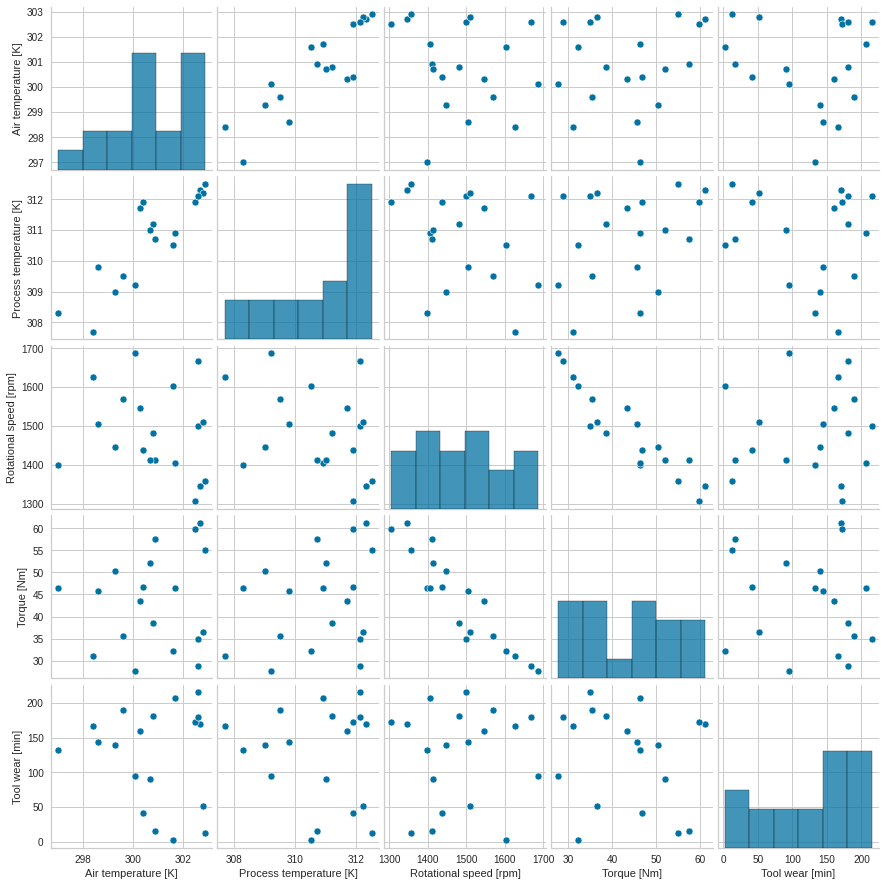

In [ ]:
sns.pairplot(analysis_rnf_df)

In [ ]:
# rnfDF.drop('Torque [Nm]', axis=1, inplace=True)
# rnfDF.drop('Rotational speed [rpm]', axis=1, inplace=True)

rnf_data = setup(data = rnfDF, 
                # numeric_imputation = "median", 
                # categorical_imputation = "mode", 
                target = "RNF", train_size = 0.75, 
                # transformation = True, 
                # transformation_method = "yeo-johnson",
                fix_imbalance = True,
                # pca=True,
                # remove_outliers = True,
                # normalize = True,
                # feature_interaction = True, 
         
                # feature_ratio = True
               )
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9983,0.5000,0.00,0.0000,0.0000,0.0000,0.0000,0.025
et,Extra Trees Classifier,0.9895,0.6267,0.05,0.0125,0.0200,0.0174,0.0214,0.852
rf,Random Forest Classifier,0.9892,0.5356,0.05,0.0125,0.0200,0.0173,0.0213,1.519
lightgbm,Light Gradient Boosting Machine,0.9880,0.6492,0.00,0.0000,0.0000,-0.0028,-0.0041,0.216
dt,Decision Tree Classifier,0.9851,0.5183,0.05,0.0077,0.0133,0.0105,0.0152,0.053
qda,Quadratic Discriminant Analysis,0.9517,0.5744,0.15,0.0022,0.0044,0.0013,0.0110,0.041
gbc,Gradient Boosting Classifier,0.9379,0.6416,0.20,0.0067,0.0129,0.0096,0.0264,1.310
ada,Ada Boost Classifier,0.8812,0.4940,0.30,0.0046,0.0091,0.0057,0.0238,0.460
knn,K Neighbors Classifier,0.8508,0.6434,0.30,0.0036,0.0071,0.0037,0.0178,0.147
svm,SVM - Linear Kernel,0.7656,0.0000,0.30,0.0013,0.0027,0.0006,0.0061,0.189


DummyClassifier(constant=None, random_state=3181, strategy='prior')

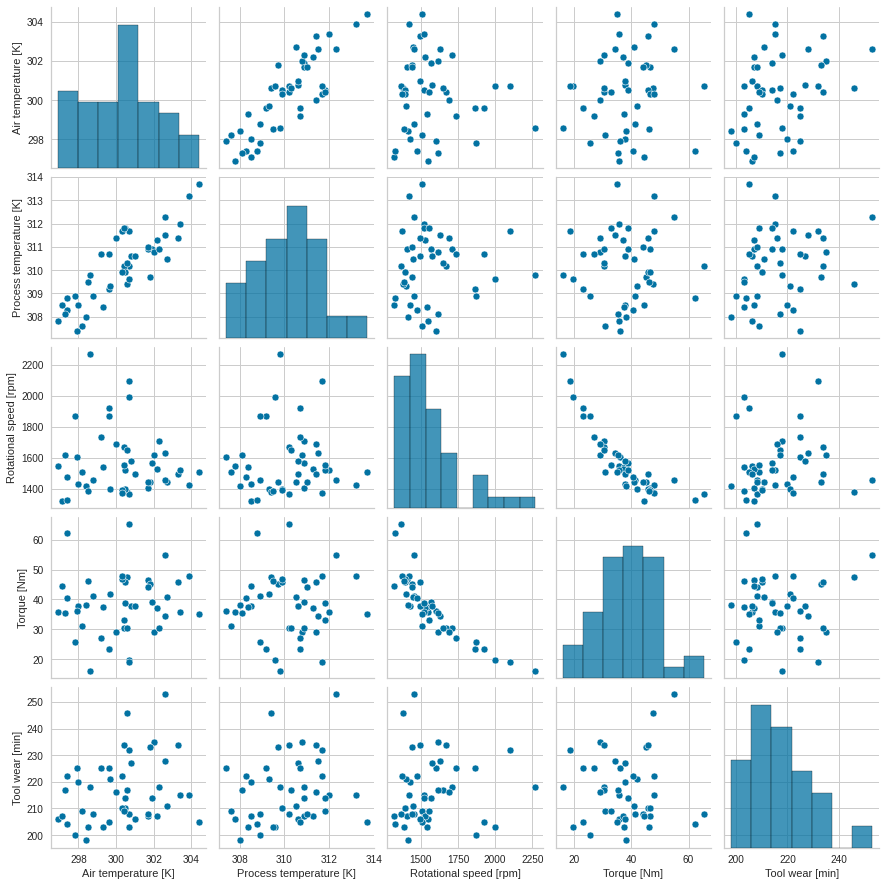

In [ ]:
sns.pairplot(analysis_twf_df)

In [ ]:
# twfDF.drop('Torque [Nm]', axis=1, inplace=True)
# twfDF.drop('Rotational speed [rpm]', axis=1, inplace=True)
twf_data = setup(data = twfDF, 
                # numeric_imputation = "median", 
                # categorical_imputation = "mode", 
                target = "TWF", train_size = 0.75, 
                transformation = True, 
                # transformation_method = "yeo-johnson",
                fix_imbalance = True,
                # pca=True,
                # remove_outliers = True,
                normalize = True,
                # feature_interaction = True, 
                remove_multicollinearity = True, 
                multicollinearity_threshold = 0.2
                # feature_ratio = True
               )
compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9955,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.024
dt,Decision Tree Classifier,0.9817,0.5344,0.0833,0.0344,0.0483,0.0417,0.0455,0.047
rf,Random Forest Classifier,0.9796,0.8824,0.0583,0.0174,0.0267,0.0198,0.0234,1.229
lightgbm,Light Gradient Boosting Machine,0.9775,0.9439,0.2333,0.0503,0.0814,0.0747,0.0987,0.155
et,Extra Trees Classifier,0.9723,0.7429,0.1417,0.0238,0.0407,0.0334,0.0483,0.761
knn,K Neighbors Classifier,0.9560,0.7707,0.5250,0.0530,0.0961,0.0886,0.1562,0.146
gbc,Gradient Boosting Classifier,0.9525,0.9408,0.5667,0.0509,0.0933,0.0857,0.1592,0.866
ada,Ada Boost Classifier,0.9309,0.9606,0.8833,0.0555,0.1043,0.0966,0.2107,0.380
lr,Logistic Regression,0.9101,0.9675,1.0000,0.0485,0.0924,0.0845,0.2092,0.051
svm,SVM - Linear Kernel,0.9067,0.0000,1.0000,0.0467,0.0892,0.0812,0.2051,0.039


DummyClassifier(constant=None, random_state=3043, strategy='prior')

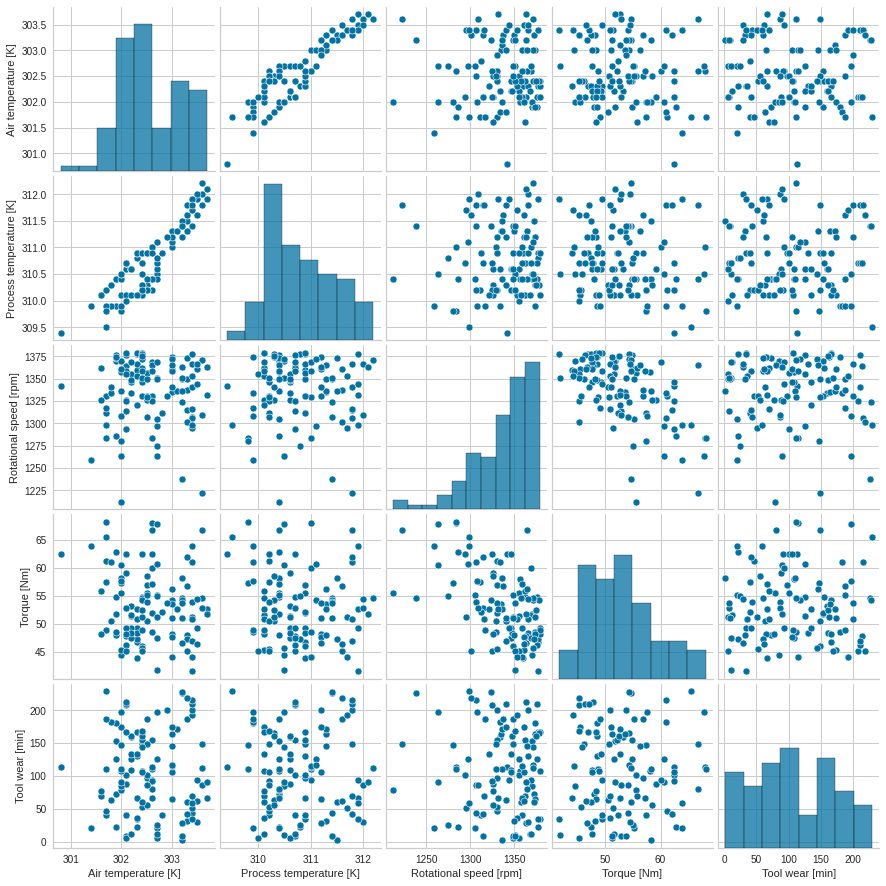

In [ ]:
sns.pairplot(analysis_hdf_df)

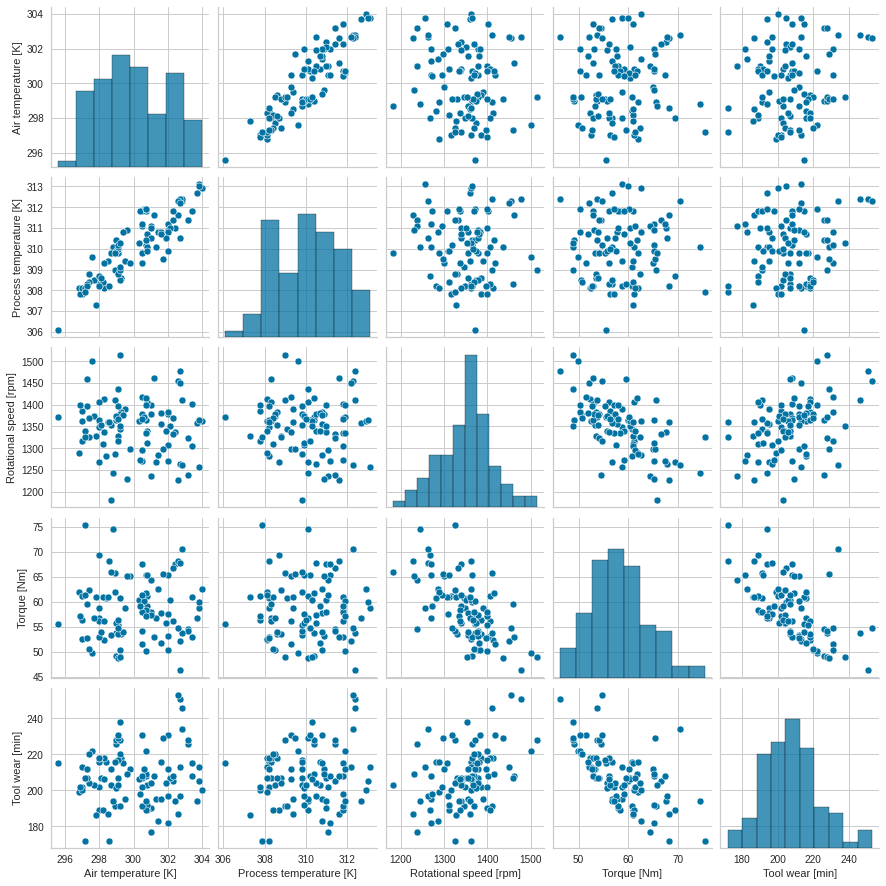

In [ ]:
sns.pairplot(analysis_osf_df)

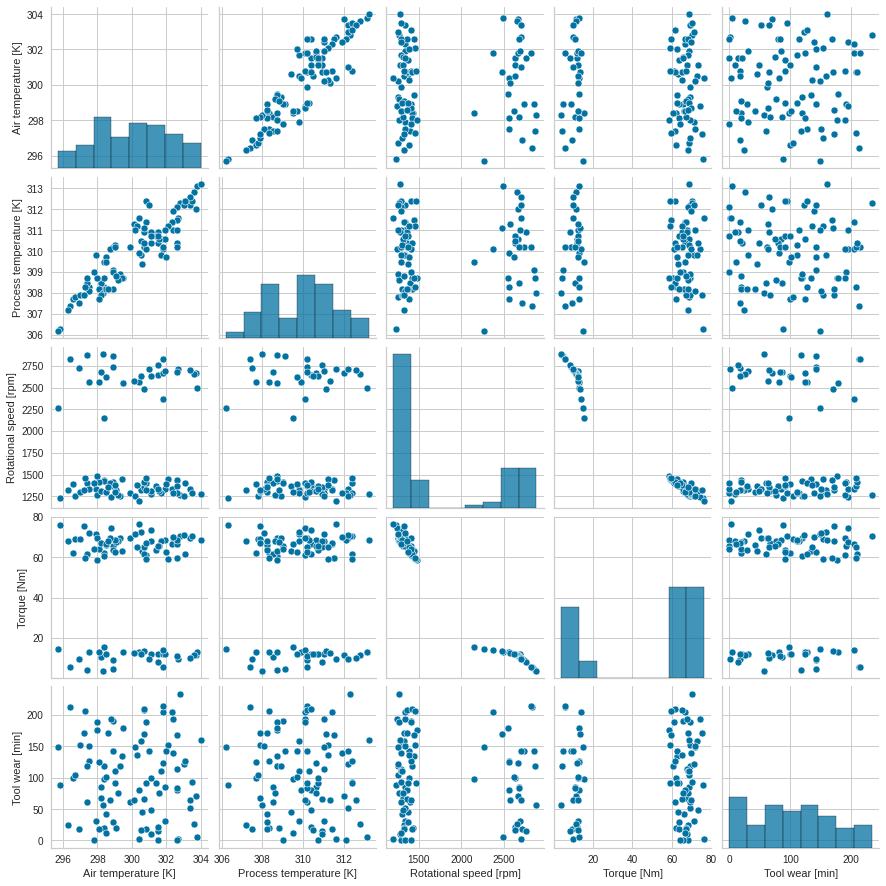

In [ ]:
sns.pairplot(analysis_pwf_df)

In [ ]:
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import train_test_split


# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
def nnData(df,mode):
  Y = df[mode]
  X = df.drop([mode], axis=1)

  print(X.shape)
  print(Y.shape)

  # convert to numpy arrays
  X = np.array(X)

  return np.array(X),Y
# def nnDeploy():
  # build a model


In [ ]:
pwfDF.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'PWF'],
      dtype='object')